In [2]:
%matplotlib inline
import random 
from mxnet import autograd, np, npx
from d2l import mxnet as d2l 

npx.set_np()

In [7]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X=np.random.normal(0,1, (num_examples,len(w)))
    y=np.dot(X, w)+b
    y+=np.random.normal(0,0.01, y.shape)
    return X, y.reshape((-1,1))

In [9]:
true_w=np.array([2,-3.4])
true_b=4.2
features, labels=synthetic_data(true_w, true_b,1000)

In [10]:
print('features:', features[0],'\nlabel:', labels[0])

features: [0.72455114 0.13263007] 
label: [5.193183]


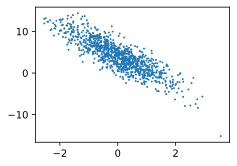

In [11]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, (1)].asnumpy(), labels.asnumpy(),1)